***<span style="font-size:24px;">Data Description</span>***

The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

***<span style="font-size:24px;">Project Goal</span>***

The main goal of this project is to design a machine learning classification system, that is able to predict an online shopper's intention ( buy or no buy ), based on the values of the given features.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Loading the dataset

data=pd.read_csv('online_shoppers_data.csv')

In [5]:
df=pd.DataFrame(data)

In [6]:
# Display the first few rows of the dataset

print("Dataset Preview:")
df.head()

Dataset Preview:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [8]:
df.shape

(12330, 18)

In [9]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [11]:
# Summary statistics

print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


***<span style="font-size:24px;">Data Cleaning</span>***

In [13]:
# Check for missing values

print("\nMissing Values:")
df.isnull().sum()


Missing Values:


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

its great thing , our dataset doesn't contains any missing values.


In [15]:
#check for duplicate values

print("Duplicate values are:")
df.duplicated().sum()

Duplicate values are:


125

In [16]:
df=df.drop_duplicates()

In [17]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


***<span style="font-size:24px;">EDA</span>***

***<span style="font-size:15px;">correlation analysis</span>***

<Axes: >

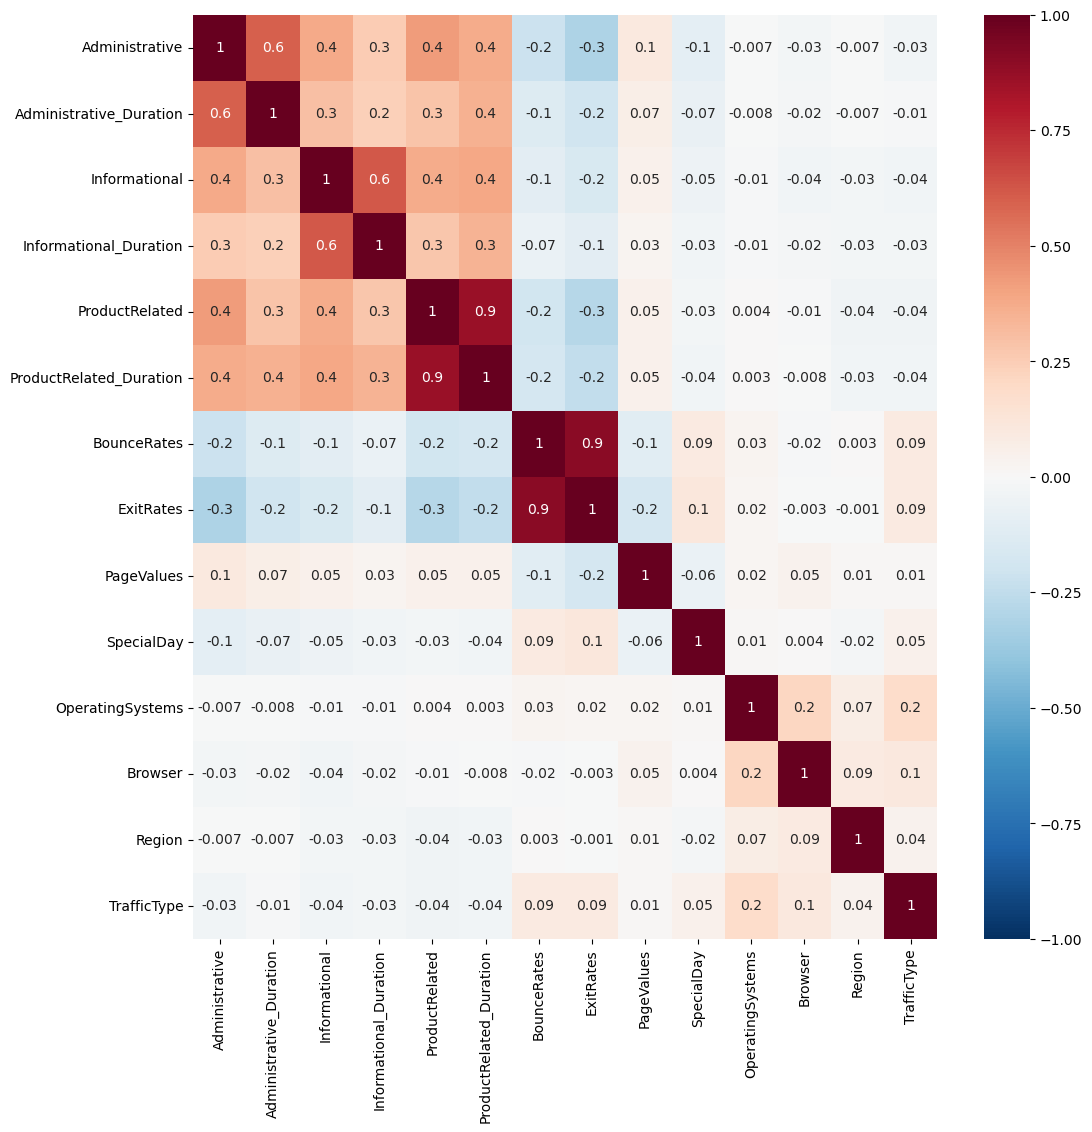

In [19]:
numerical_data = df.select_dtypes(include=['number'])
c=numerical_data.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(c, annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap='RdBu_r')

From the above heatmap ,we observed that:
Thre exist very little correlation among the different features in our dataset.
BounceRates & ExitRates (0.9) and ProductRelated & ProductRelated_Duration (0.9) only have the high corelation.

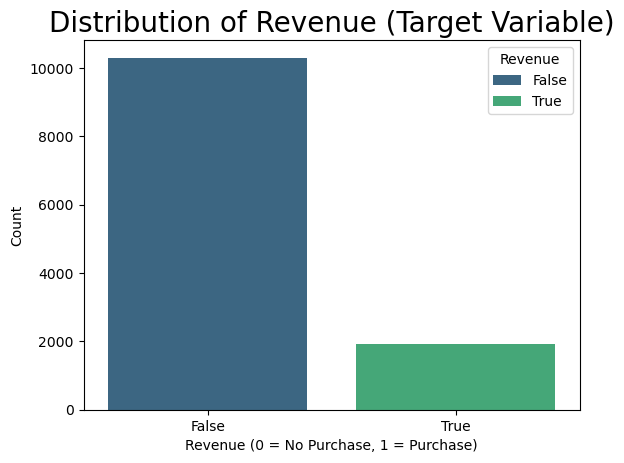

In [21]:
# checking the Distribution of customers on Revenue

sns.countplot(x='Revenue', data=df,hue='Revenue',palette='viridis')
plt.title('Distribution of Revenue (Target Variable)',fontsize=20)
plt.xlabel('Revenue (0 = No Purchase, 1 = Purchase)')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'count')

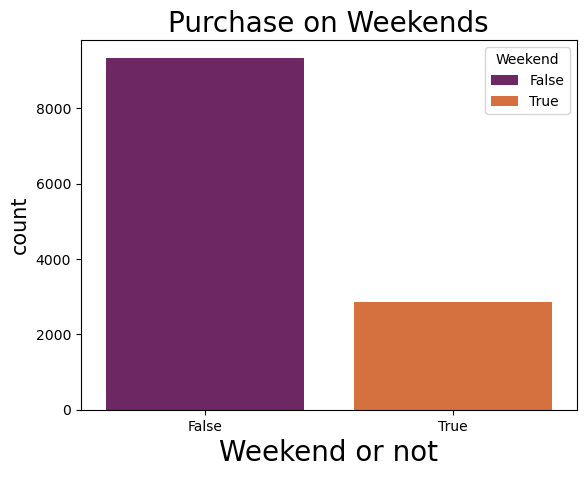

In [22]:
# checking the Distribution of customers on Weekend


sns.countplot(x='Weekend', data=df,hue='Weekend',palette='inferno')
plt.title('Purchase on Weekends', fontsize = 20)
plt.xlabel('Weekend or not', fontsize = 20)
plt.ylabel('count', fontsize = 15)


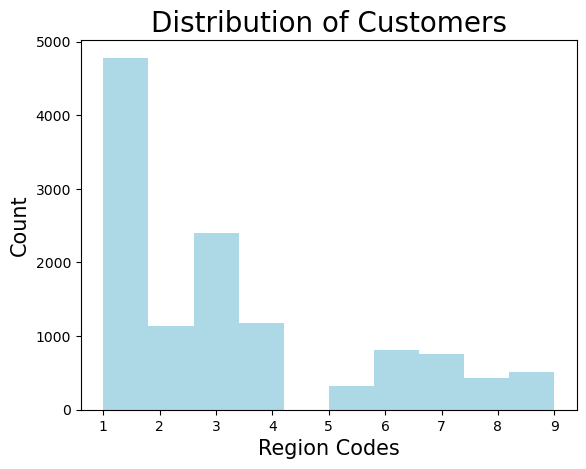

In [23]:
# visualizing the distribution of customers around the Region


plt.hist(data['Region'], color = 'lightblue')
plt.title('Distribution of Customers',fontsize = 20)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

***VISITOR ANALYSIS***

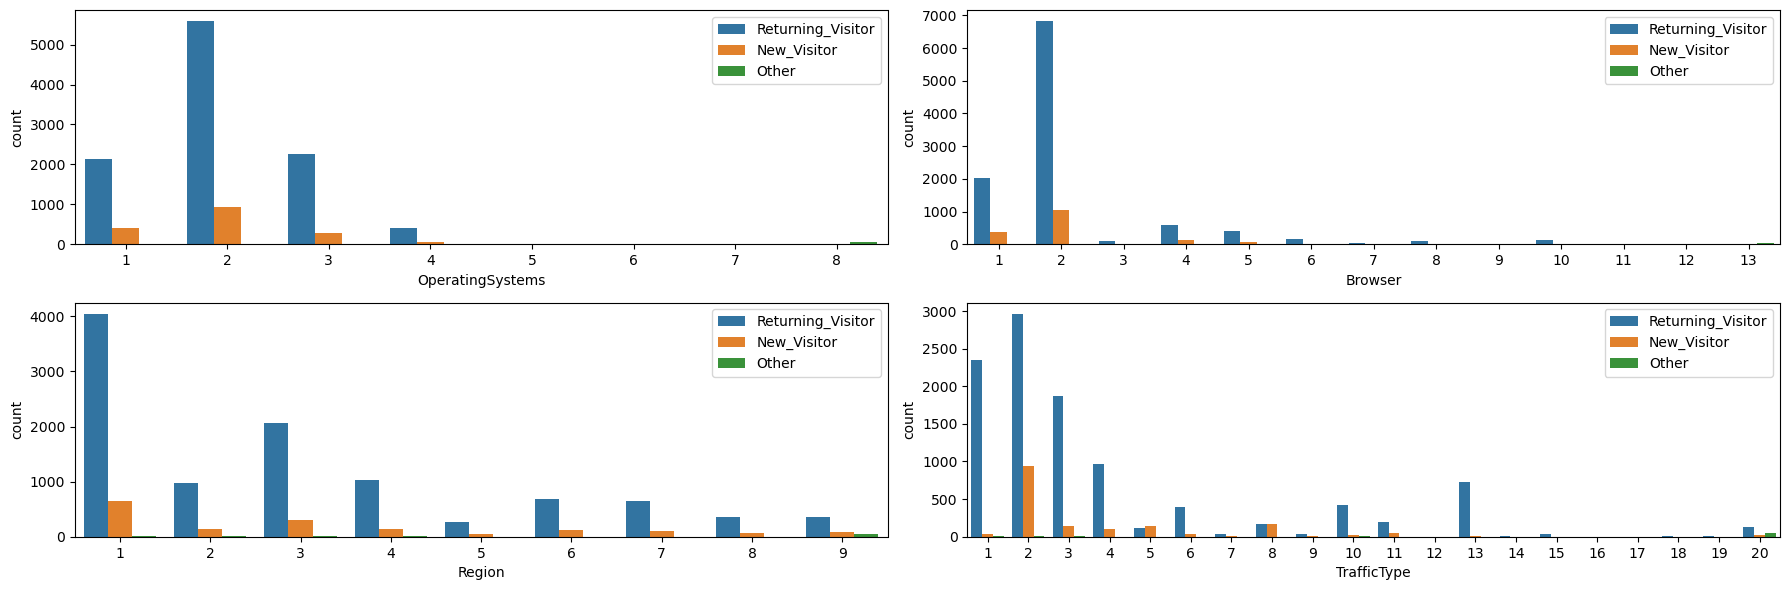

In [25]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.countplot(data=df, x='OperatingSystems', hue='VisitorType', ax=ax1)
sns.countplot(data=df, x='Browser', hue='VisitorType', ax=ax2)
sns.countplot(data=df, x='Region', hue='VisitorType', ax=ax3)
sns.countplot(data=df, x='TrafficType', hue='VisitorType', ax=ax4)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
plt.tight_layout()
plt.show()

***VISIT DATE ANALYSIS***

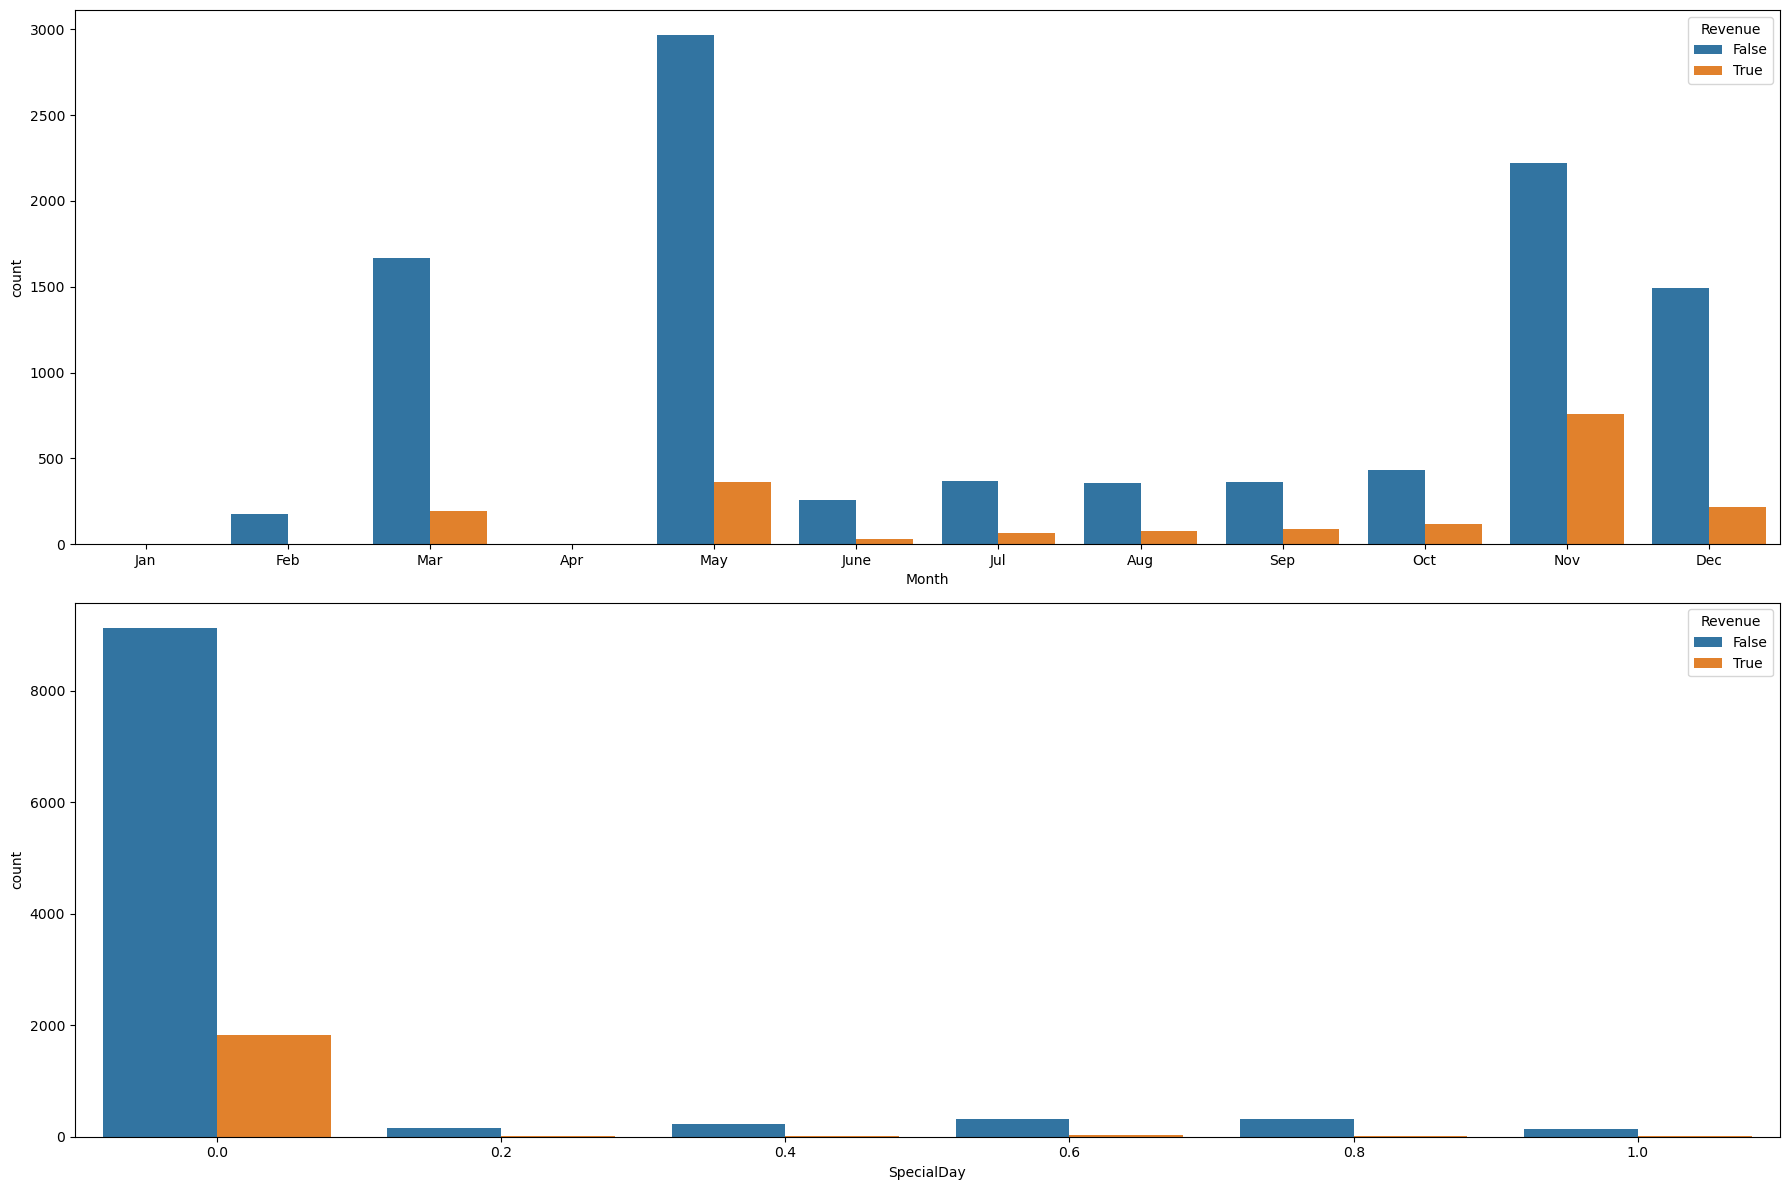

In [27]:
fig = plt.figure(figsize=(18, 12))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(data=df, x='Month', hue='Revenue', ax=ax1, order=orderlist)
sns.countplot(data=df, x='SpecialDay', hue='Revenue', ax=ax2)

plt.tight_layout()
plt.show()

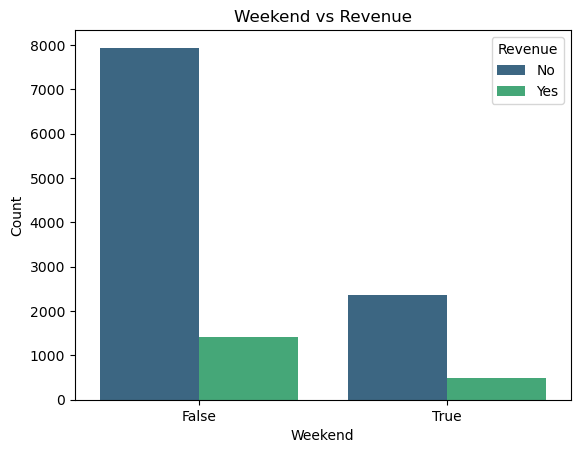

In [28]:
# Plot Weekend vs Revenue

sns.countplot(data=df, x='Weekend', hue='Revenue', palette='viridis')
plt.title("Weekend vs Revenue")
plt.xlabel("Weekend")
plt.ylabel("Count")
plt.legend(title="Revenue", labels=["No", "Yes"])
plt.show()

***<span style="font-size:20px;">OUTLIER DETECTION</span>***

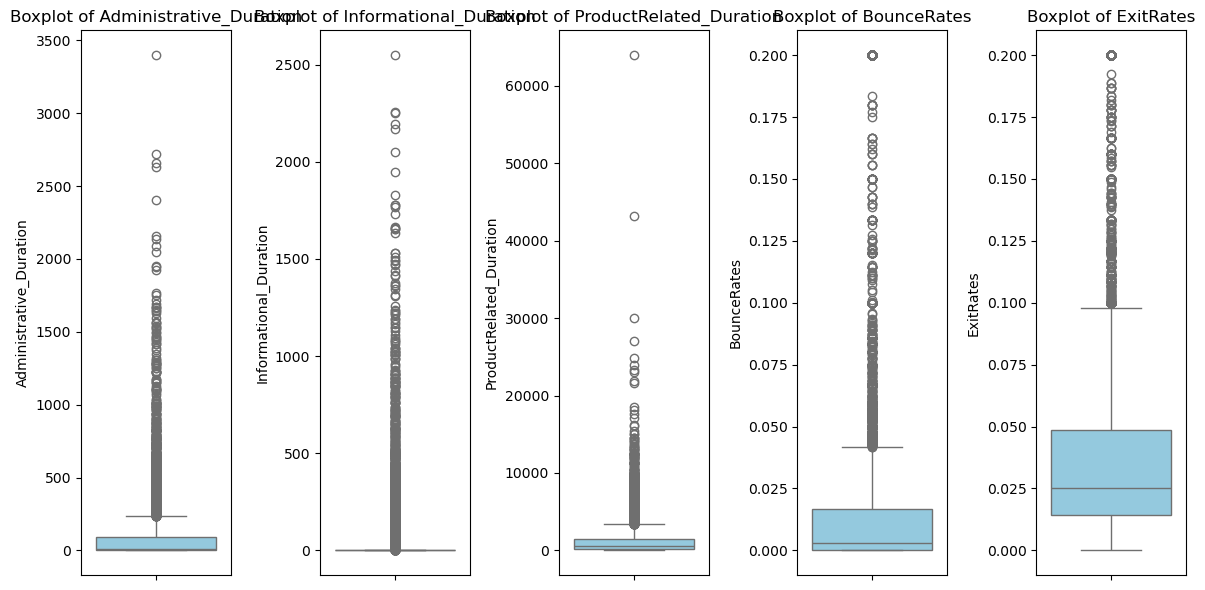

In [30]:
# List of columns to check
columns_to_check = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration','BounceRates','ExitRates']

# Create boxplots for each column
plt.figure(figsize=(12, 6))  # Adjust the figure size

for i, col in enumerate(columns_to_check, 1):  # Enumerate to track subplot index
    plt.subplot(1, 5, i) 
    # Create subplots (1 row, 3 columns)
    sns.boxplot(y=df[col], color='skyblue')  # Boxplot for the current column
    plt.title(f'Boxplot of {col}')  # Title for the subplot
    plt.ylabel(col)  # Label the y-axis
    plt.xlabel('')  # No label for the x-axis

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

***OUTLIER HANDLING***

In [32]:
#Lets handle the outliers

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers
    
    # Cap the outliers by clipping values outside the bounds
    df[col] = df[col].clip(lower_bound, upper_bound)

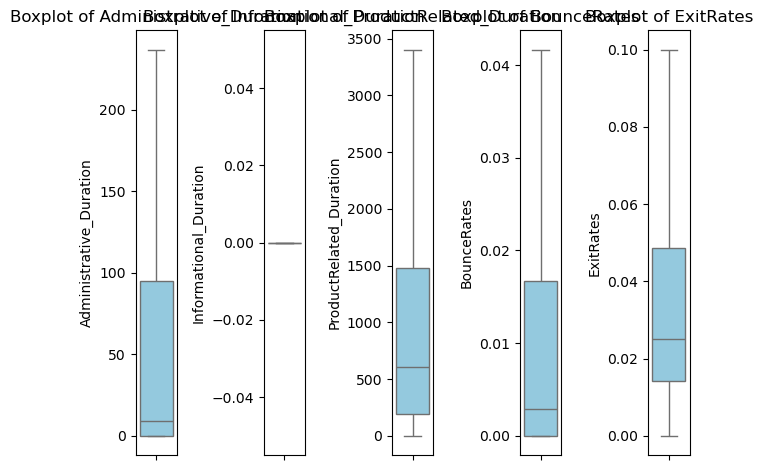

In [33]:
for i, col in enumerate(columns_to_check, 1):  # Enumerate to track subplot index
    plt.subplot(1, 5, i)  # Create subplots (1 row, 3 columns)
    sns.boxplot(y=df[col], color='skyblue')  # Boxplot for the current column
    plt.title(f'Boxplot of {col}')  # Title for the subplot
    plt.ylabel(col)  # Label the y-axis
    plt.xlabel('')  # No label for the x-axis

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [34]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.041667,0.099977,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.099977,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.041667,0.099977,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.041667,0.099977,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


***Here we got our cleaned data by removing outliers***

***SKEWNWESS CHECKING***

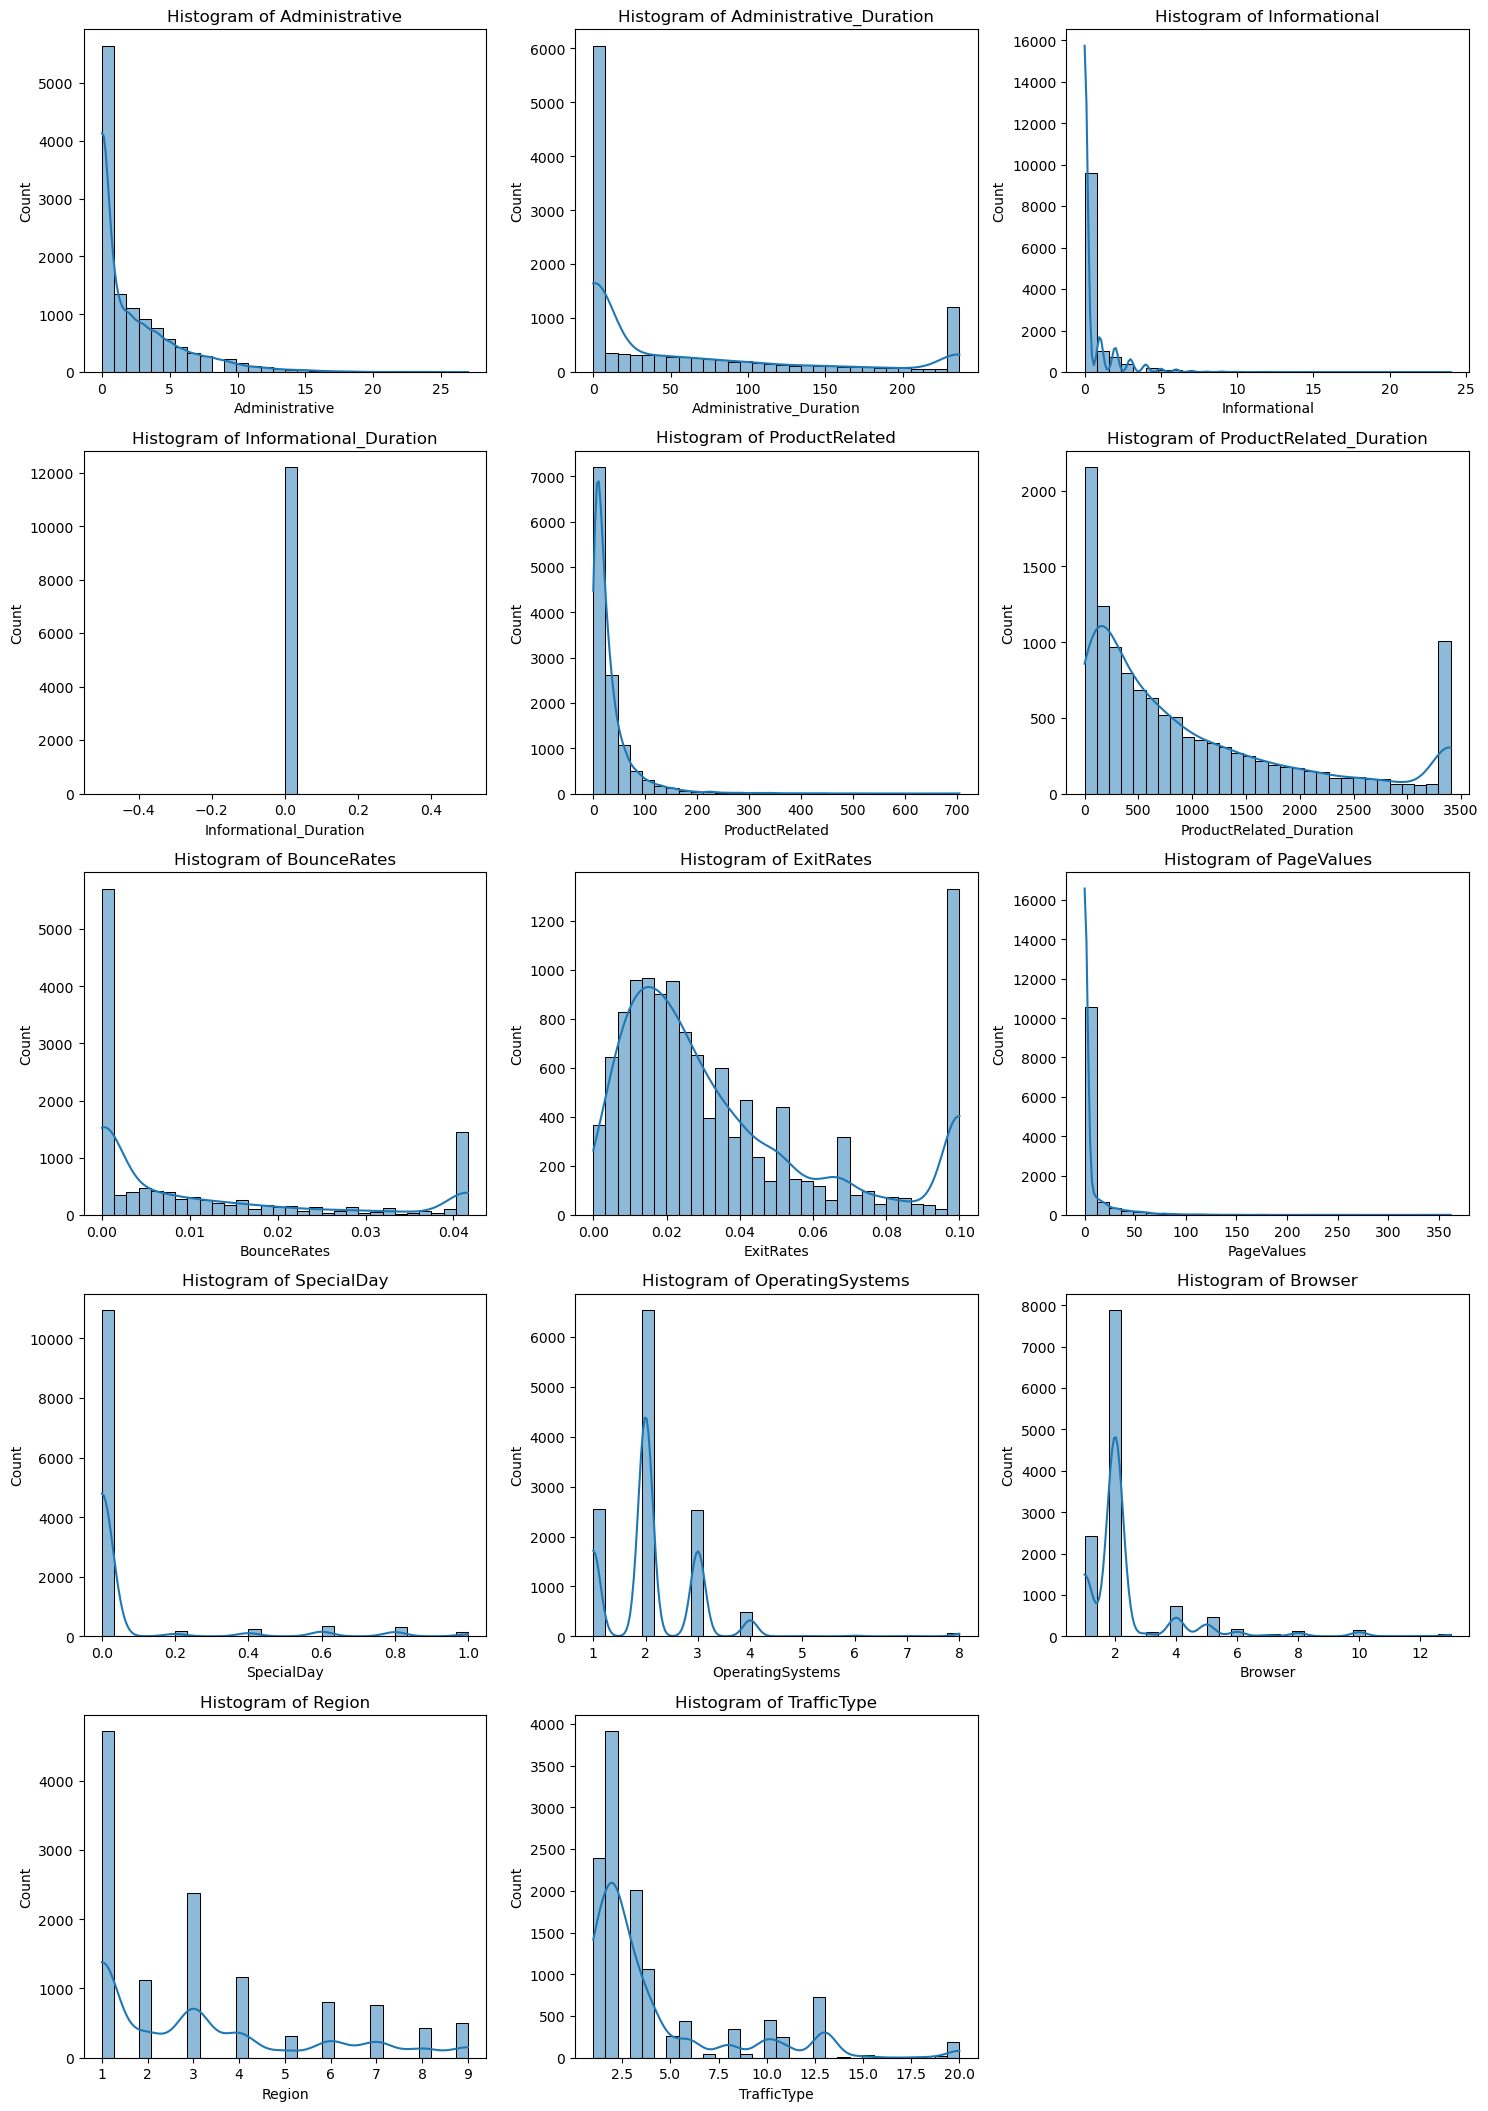

In [37]:
# Let check fro skewness

plt.figure(figsize=(15,25))
for i, col in enumerate(numerical_data):
    plt.subplot(6,3,i+1)
    plt.title(f"Histogram of {col}")
    sns.histplot(df[col], bins=30, kde=True, edgecolor='black')
plt.tight_layout()
plt.show() 

In [38]:
from scipy.stats import skew
# Select numerical columns (make sure they are properly selected)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns].skew()

Administrative             1.947123
Administrative_Duration    1.234182
Informational              4.014173
Informational_Duration     0.000000
ProductRelated             4.333419
ProductRelated_Duration    1.156859
BounceRates                1.234544
ExitRates                  1.119473
PageValues                 6.350983
SpecialDay                 3.285902
OperatingSystems           2.032613
Browser                    3.217404
Region                     0.978480
TrafficType                1.958514
dtype: float64

For Symmetrical Distribution (No Skewness) Skewness ≈ 0

-0.5 to 0.5: Fairly symmetrical distribution (considered ideal). -1 to -0.5 or 0.5 to 1: Moderately skewed but often acceptable for many analyses.

Less than -1 or greater than 1: Highly skewed, may require data transformation (e.g., log transformation, square root transformation)

***HANDLING SKEWNESS OF ALL NUMERICAL COLUMNS***

In [41]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson")
df[numerical_columns]=pt.fit_transform(df[numerical_columns])
df[numerical_columns].skew()

Administrative             0.233985
Administrative_Duration    0.101334
Informational              1.388631
Informational_Duration     0.000000
ProductRelated            -0.001725
ProductRelated_Duration   -0.156336
BounceRates                0.568852
ExitRates                  0.255073
PageValues                 1.362402
SpecialDay                 2.624728
OperatingSystems          -0.009848
Browser                   -0.001798
Region                     0.128463
TrafficType                0.150882
dtype: float64

***<span style="font-size:20px;">ENCODING</span>***

In [110]:
df.Revenue = df.Revenue.astype('int')
df.Weekend = df.Weekend.astype('int')
from sklearn.preprocessing import LabelEncoder,StandardScaler
cat_col=df.select_dtypes(include=["object"])

In [112]:
df1=df.copy()

In [114]:
le = LabelEncoder()
for x in cat_col:
    df1[x]=le.fit_transform(df1[x])
    
    

In [116]:
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.998474,-1.009781,-0.523851,0.0,-1.976591,-2.068092,1.673713,1.715822,-0.532801,-0.33763,2,-1.596655,-1.633055,-1.118968,-1.466588,2,0,0
1,-0.998474,-1.009781,-0.523851,0.0,-1.620640,-1.180714,-0.898968,1.715822,-0.532801,-0.33763,2,0.021357,0.098337,-1.118968,-0.392222,2,0,0
2,-0.998474,-1.009781,-0.523851,0.0,-1.976591,-2.068092,1.673713,1.715822,-0.532801,-0.33763,2,1.821793,-1.633055,1.658140,0.195044,2,0,0
3,-0.998474,-1.009781,-0.523851,0.0,-1.620640,-1.898532,1.673713,1.715822,-0.532801,-0.33763,2,1.065940,0.098337,-0.203990,0.571142,2,0,0
4,-0.998474,-1.009781,-0.523851,0.0,-0.466390,0.028046,1.129100,0.831754,-0.532801,-0.33763,2,1.065940,0.916895,-1.118968,0.571142,2,1,0


***<span style="font-size:20px;">Feature Selection</span>***

In [48]:
#Splitting the data

X = df1.drop(columns = ['Revenue'])
y = df1['Revenue']

In [49]:
from sklearn.feature_selection import SelectKBest,f_regression,RFE

In [50]:
select=SelectKBest(score_func=f_regression,k=20)
X_new=select.fit_transform(X,y)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=20 is greater than n_features=17. All the features will be returned.
  warnings.warn(


In [51]:
selected_features=X.columns[select.get_support()]
feature_score=pd.DataFrame({"Features":X.columns,"Score":select.scores_}).sort_values(by ="Score",ascending=False)

In [52]:
print(selected_features)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')


In [53]:
from sklearn.model_selection import train_test_split

In [96]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.2,random_state=42)

In [98]:
print("Shape of x_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (9764, 17)
Shape of y_train : (9764,)
Shape of x_test : (2441, 17)
Shape of y_test : (2441,)
